In [6]:
import Pkg
Pkg.activate(".")

  Activating project at `f:\Programming\JuliaML`

In [8]:
using Plots
using DataFrames
using MLJ
using MLUtils
using RDatasets
using Clustering

In [9]:
df = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [10]:
y = df.Species
X = select(df, 1:4)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth
,Float64,Float64,Float64,Float64
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2


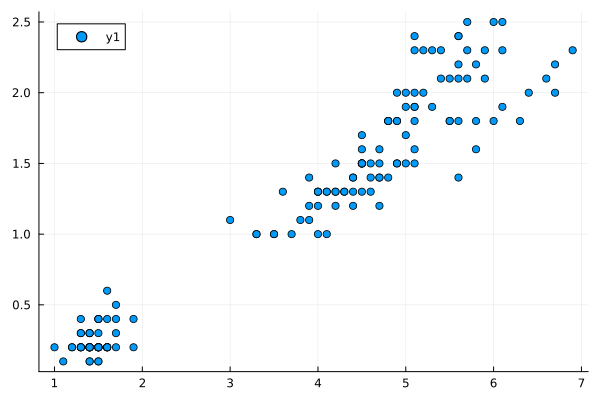

In [11]:
scatter(df.PetalLength, df.PetalWidth)

In [12]:
costs = []
for i = 1:10
    Matrix
    model = kmeans(collect(Matrix(X)'), i)
    push!(costs, model.totalcost)
end

In [13]:
costs

10-element Vector{Any}:
 681.3705999999988
 152.34795176035752
  78.85144142614705
  57.25600931571904
  49.977678460300176
  41.71201010101039
  37.00037098515476
  30.47622294372293
  30.621684102955044
  32.772731792717195

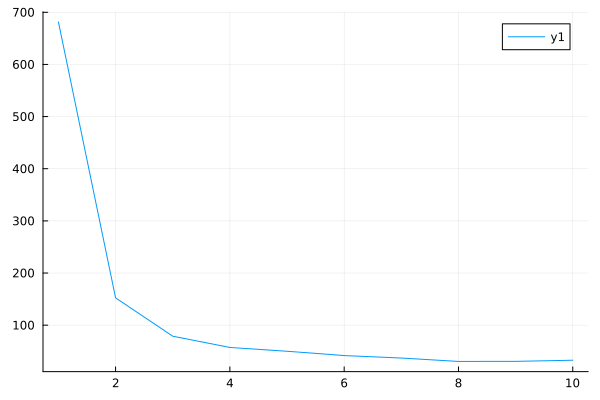

In [14]:
plot(1:10, costs)

In [15]:
model = kmeans(collect(Matrix(X)'), 3, display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------


      0       9.901000e+01


      1       8.471233e+01      -1.429767e+01 |        2
      2       8.401278e+01      -6.995510e-01 |        2
      3       8.304698e+01      -9.657970e-01 |        2
      4       8.174960e+01      -1.297380e+00 |        2
      5       8.080638e+01      -9.432261e-01 |        2
      6       7.987358e+01      -9.327962e-01 |        2
      7       7.934436e+01      -5.292157e-01 |        2
      8       7.892131e+01      -4.230544e-01 |        2
      9       7.885567e+01      -6.564390e-02 |        0
     10       7.885567e+01       0.000000e+00 |        0
K-means converged with 10 iterations (objv = 78.8556658259767)


KmeansResult{Matrix{Float64}, Float64, Int64}([6.853846153846153 5.005999999999999 5.88360655737705; 3.0769230769230766 3.428000000000001 2.740983606557377; 5.715384615384615 1.4620000000000002 4.388524590163935; 2.053846153846153 0.2459999999999999 1.4344262295081966], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 3, 1, 1, 1, 3, 1, 1, 3], [0.019980000000018094, 0.20038000000000977, 0.17398000000001446, 0.2759800000000041, 0.03557999999999595, 0.45838000000000534, 0.17238000000000397, 0.004380000000011819, 0.6519799999999947, 0.1415800000000189  …  0.1573372781064677, 0.4419526627218886, 0.7316259070142337, 0.11272189349114115, 0.2727218934911093, 0.3557988165680399, 0.8221177102929005, 0.3996449704141867, 0.6919526627218886, 0.7071996775060256], [39, 50, 61], [39, 50, 61], 78.8556658259767, 10, true)

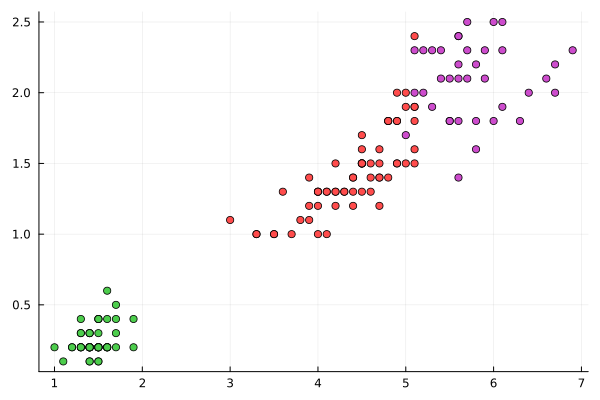

In [16]:
scatter(df.PetalLength, df.PetalWidth, marker_z=model.assignments, color=:lightrainbow, legend=false)

In [17]:
function encode(x) :: Integer
	if x == "setosa"
		0
	elseif x == "virginica"
		2
	else
		1
	end
end

encode (generic function with 1 method)

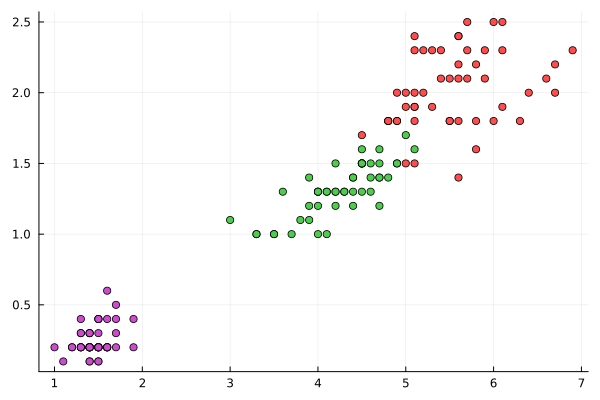

In [18]:
scatter(df.PetalLength, df.PetalWidth, marker_z=map(encode , y), color=:lightrainbow, legend=false)